In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import Axes

In [2]:
def get_years_dfs(misinfotext_path: str, fakespeak_path: str):
    misinfotext_file = pd.ExcelFile(misinfotext_path)
    
    for sheet in misinfotext_file.sheet_names:
        if sheet == "Summary":
            continue
        
        df = pd.read_excel(misinfotext_file, sheet_name=sheet)
        df["year"] = int(sheet)
        yield df
    
    fakespeak_file = pd.ExcelFile(fakespeak_path)
    
    for sheet in fakespeak_file.sheet_names:
        if sheet == "Summary":
            continue
        
        df = pd.read_excel(fakespeak_file, sheet_name=sheet)
        df["year"] = int(sheet)
        yield df

def get_full_df(misinfotext_path: str, fakespeak_path: str):
    return pd.concat(get_years_dfs(misinfotext_path, fakespeak_path))

In [3]:
def get_summary_dfs(misinfotext_path: str, fakespeak_path: str):
    df = get_full_df(misinfotext_path, fakespeak_path)

    all_polarities_summary_df = df.groupby("year")["polarity"].describe().reset_index()
    positive_polarities_summary_df = df[df["polarity"] > 0].groupby("year")["polarity"].describe().reset_index()
    negative_polarities_summary_df = df[df["polarity"] < 0].groupby("year")["polarity"].describe().reset_index()
    subjectivity_summary_df = df.groupby("year")["subjectivity"].describe().reset_index()

    return  all_polarities_summary_df, \
            positive_polarities_summary_df, \
            negative_polarities_summary_df, \
            subjectivity_summary_df

In [4]:
news_and_blog_all_polarities, \
news_and_blog_positive_polarity, \
news_and_blog_negative_polarity, \
news_and_blog_subjectivity \
    = get_summary_dfs(
        misinfotext_path="./data/MisInfoText/Analysis_output/news_and_blog/MisInfoText_news_and_blog_sentiment_analysis_headlines.xlsx", 
        fakespeak_path="./data/Fakespeak-ENG/Analysis_output/news_and_blog/Fakespeak_news_and_blog_sentiment_analysis_headlines.xlsx"
    )

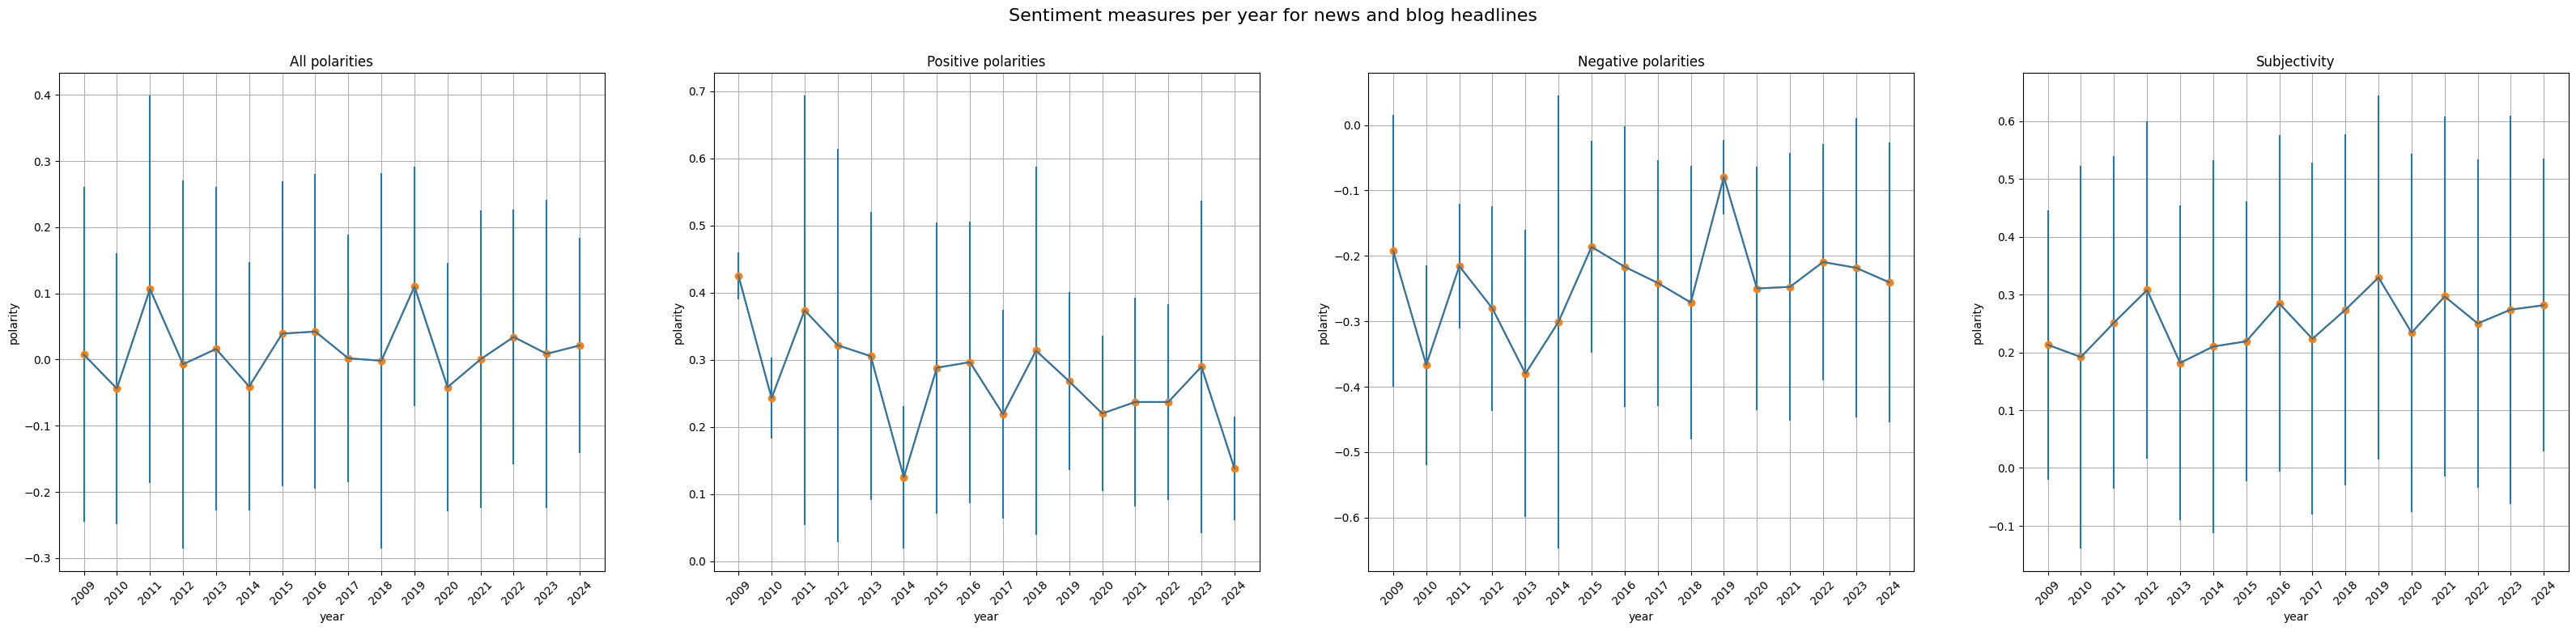

In [12]:
fig, axes = plt.subplots(
    nrows=1, 
    ncols=4, 
    figsize=(40, 8),
    squeeze=False
)

axes_flat: list[Axes] = axes.flatten()

fig.suptitle("Sentiment measures per year for news and blog headlines", fontsize=16)

def plot_data_on_ax(i: str, df: pd.DataFrame, title: str):
    years = list(df["year"])
    
    ax = axes_flat[i]

    ax.set_title(title)

    ax.set_xlabel("year")
    ax.grid(True)
    
    ax.set_xticks(list(years))
    ax.set_xticklabels([str(y) for y in years])
    ax.tick_params(axis="x", rotation=45)

    ax.set_ylabel("polarity")

    ax.errorbar(
        x=years, 
        y=df["mean"], 
        yerr=df["std"],
    )
    ax.plot(years, df["mean"], marker="o")

plot_data_on_ax(0, news_and_blog_all_polarities, "All polarities")
plot_data_on_ax(1, news_and_blog_positive_polarity, "Positive polarities")
plot_data_on_ax(2, news_and_blog_negative_polarity, "Negative polarities")
plot_data_on_ax(3, news_and_blog_subjectivity, "Subjectivity")

fig.savefig("./visualization/sentiment/lineplot_headlines.png")